<a href="https://colab.research.google.com/github/varshithav-nri/Introduction_to_dataanalysis/blob/main/Data_Visualization_using_Pandas_13_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
datasetPath = '/content/matches_1930_2022.csv'

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(datasetPath)

In [6]:
df

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,NaN,0,NaN,NaN,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960,Yugoslavia,Brazil,2,NaN,NaN,1,NaN,NaN,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,Romania,Peru,3,NaN,NaN,1,NaN,NaN,Octav Luchide,Emerich Vogl,...,NaN,NaN,NaN,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN
962,United States,Belgium,3,NaN,NaN,0,NaN,NaN,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

In [ ]:
df['home_team'].info()


In [ ]:
df['home_team'].value_counts()

In [ ]:
df['Date'].value_counts()

In [ ]:
df['Score'].value_counts()

In [ ]:
df.shape


In [ ]:
ScoredAboveZero = df['Score'] > '0-0'

In [ ]:
df[ScoredAboveZero]

In [ ]:
ScoredByBrazil = df['home_team'] == 'Brazil'

In [ ]:
df[ScoredAboveZero & ScoredByBrazil]

In [ ]:
df[ScoredAboveZero & ScoredByBrazil].plot()

In [ ]:
df[ScoredAboveZero & ScoredByBrazil].plot(x= 'home_team', y= 'Year', kind= 'pie')

In [ ]:
brazildf = df[ScoredAboveZero & ScoredByBrazil].sort_values(by = 'home_score' ,ascending= False)

In [ ]:
brazildf.info()

In [ ]:
%matplotlib inline

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
brazildf.plot(x='home_score', y='away_score',kind= 'scatter')

In [ ]:
brazildf.plot(x='home_score', y='away_score', kind='scatter')
plt.xlabel('Brazil Home Score')
plt.ylabel('Brazil Away Score')
plt.legend('Takeaway')
plt.show()

In [ ]:
brazildf.plot(x='Year', y='away_score', kind='hist')
plt.xlabel('Year')
plt.ylabel('Brazil Away Score')
plt.legend('Takeaway')
plt.show()

In [ ]:
brazildf.plot(x='Year', y='home_score',kind= 'hexbin')

In [ ]:
brazildf.plot(x='Year', y='home_score',kind= 'density')

In [ ]:
matchesPlayed = df['home_team'].value_counts()
matchesPlayed

In [ ]:
def AnalyseFrance():
  matchesPlayed = df['home_team'].value_counts()['France']
  print(f'No of matches played by france is : {matchesPlayed}')

In [ ]:
 AnalyseFrance()

In [ ]:
def AnalyseTown():
  TownData = df['home_team'].value_counts()
  for _ in TownData.index:
    print(f'No of matches played by {_} is : {TownData[_]}')

In [ ]:
AnalyseTown()

In [ ]:
town30 = df['home_team'].value_counts().values > 30
town30

In [ ]:
%matplotlib inline

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
townName = []
matchesPlayed = []
TownData = df['home_team'].value_counts()
for _ in TownData.index:
  if TownData[_] > 30:
    townName.append(_)
    matchesPlayed.append(TownData[_])


In [ ]:
plt.barh(townName, matchesPlayed)
plt.ylabel('Town Name')
plt.xlabel('Matches Played')
plt.title('Matches Played by Town')
plt.show()

In [ ]:
def MatchesPlayedByTown():
  townName = []
  matchesPlayed = []
  TownData = df['home_team'].value_counts()
  for _ in TownData.index:
   if TownData[_] > 30:
     townName.append(_)
     matchesPlayed.append(TownData[_])
  plt.barh( townName, matchesPlayed)
  plt.ylabel('Town Name')
  plt.xlabel('Matches Played')
  plt.title('Matches Played by Town')
  plt.show()

MatchesPlayedByTown()



In [ ]:
def MatchesPlayedByTown2():
 Above30 = df['home_team'].value_counts()
 filteredData = Above30[Above30 > 30]
 filteredData.plot(kind= 'bar')

MatchesPlayedByTown2()


In [ ]:
filteredData = df['home_team'].value_counts()
f2 = filteredData[filteredData >= 40].index
f2

In [ ]:
df2= df[df['home_team'].isin(f2)]
df2

In [ ]:
df2['home_xg'].value_counts()

In [ ]:
df2.plot(x= 'home_team', y= 'home_xg', kind= 'bar')

In [ ]:
f3 = df2['home_xg'] >2.5
df3 = df2[f3]
df3


In [ ]:
df3.plot(kind= 'bar', x= 'home_team', y= 'home_xg')
plt.xlabel("Home Team")
plt.ylabel("Home XG")
plt.title("Home XG Analysis")
plt.show()

In [ ]:
df3.plot(x= 'home_team', y= ['home_score','home_xg'], kind= 'bar',color= ['purple','teal'])
plt.xlabel("Home Team")
plt.ylabel("Home XG")
plt.title("Home Teams XG Analysis")
plt.show()

In [ ]:
df4 = df.groupby('home_team')['home_score'].mean()
df4

In [ ]:
df.groupby('home_team')['home_score'].describe()

In [ ]:
df.describe()


In [ ]:
dg= df.groupby("home_team")["home_xg"]

In [ ]:
print(dg.mean())

In [ ]:
das = pd.DataFrame({
    'Branch':['CSE','BBA','BBA','CSE','ECE'],
    'Name':['One','Two','Three','Four','Five'],
    'Salary':[10000,20000,13000,14000,21000],
})
das

In [ ]:
sv = das.groupby('Branch')['Salary']
print(sv)

In [ ]:
sv.mean()

In [ ]:
das.describe()

In [ ]:
sv.agg(['mean', 'min'])

In [ ]:
sv1 = das.groupby(['Branch','Name'])['Salary']
sv1

In [ ]:
sv1.mean()

In [7]:
import random

In [8]:
age = []
height = []
weight = []


In [9]:
df.shape

(964, 44)

In [10]:
#loopcomprehension
[age.append(random.randint(18,40)) for _ in range(964)]
print(f'{len(age)}')

964


In [11]:
age


[20,
 31,
 20,
 25,
 25,
 30,
 28,
 33,
 33,
 28,
 30,
 33,
 19,
 37,
 38,
 31,
 21,
 36,
 25,
 29,
 32,
 37,
 29,
 30,
 35,
 21,
 30,
 40,
 31,
 18,
 20,
 40,
 26,
 33,
 23,
 32,
 24,
 27,
 23,
 28,
 26,
 24,
 38,
 30,
 35,
 31,
 26,
 38,
 25,
 30,
 23,
 35,
 30,
 38,
 26,
 28,
 40,
 22,
 27,
 32,
 26,
 29,
 22,
 40,
 19,
 20,
 37,
 22,
 35,
 29,
 20,
 39,
 32,
 31,
 30,
 30,
 35,
 32,
 19,
 38,
 27,
 30,
 38,
 21,
 40,
 31,
 29,
 20,
 25,
 27,
 36,
 32,
 32,
 19,
 34,
 36,
 30,
 19,
 29,
 21,
 33,
 40,
 35,
 30,
 35,
 37,
 23,
 25,
 26,
 39,
 25,
 18,
 24,
 38,
 36,
 30,
 31,
 33,
 24,
 34,
 23,
 18,
 18,
 27,
 32,
 32,
 20,
 23,
 29,
 37,
 37,
 31,
 23,
 20,
 27,
 20,
 31,
 36,
 27,
 23,
 25,
 40,
 36,
 29,
 19,
 27,
 25,
 30,
 33,
 28,
 21,
 25,
 28,
 31,
 29,
 31,
 19,
 23,
 33,
 18,
 20,
 38,
 29,
 21,
 33,
 25,
 34,
 21,
 20,
 25,
 32,
 27,
 23,
 18,
 24,
 40,
 27,
 33,
 39,
 26,
 35,
 27,
 24,
 31,
 33,
 23,
 35,
 18,
 27,
 33,
 22,
 32,
 30,
 36,
 38,
 20,
 33,
 30,
 39,
 33,


In [12]:
#adding anew column
#syntax= df['new column name'] = list
df['years_of_experience'] = age
df

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,years_of_experience
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,20
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,31
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,20
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",25
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,NaN,0,NaN,NaN,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
960,Yugoslavia,Brazil,2,NaN,NaN,1,NaN,NaN,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
961,Romania,Peru,3,NaN,NaN,1,NaN,NaN,Octav Luchide,Emerich Vogl,...,NaN,NaN,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN,33
962,United States,Belgium,3,NaN,NaN,0,NaN,NaN,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40


In [13]:
df['ASP'] = df['years_of_experience'] - df['home_score']

In [14]:
df

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,years_of_experience,ASP
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,20,17
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,31,29
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,20,18
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",25,22
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,25,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,NaN,0,NaN,NaN,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,29
960,Yugoslavia,Brazil,2,NaN,NaN,1,NaN,NaN,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,23
961,Romania,Peru,3,NaN,NaN,1,NaN,NaN,Octav Luchide,Emerich Vogl,...,NaN,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN,33,30
962,United States,Belgium,3,NaN,NaN,0,NaN,NaN,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,37


In [16]:
%matplotlib inline


In [17]:
from matplotlib import pyplot as plt

<Axes: ylabel='Frequency'>

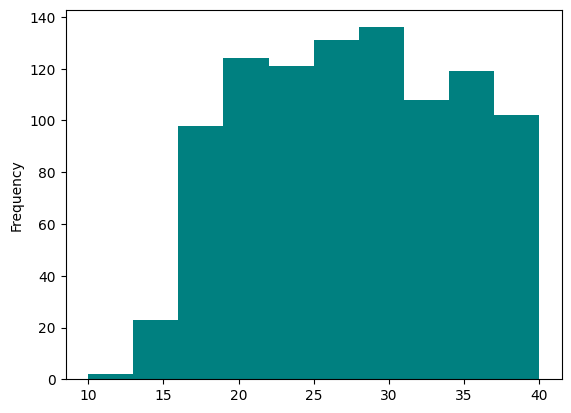

In [22]:
df['ASP'].plot(kind= 'hist', color= 'teal')

<Axes: xlabel='years_of_experience', ylabel='[ASP]'>

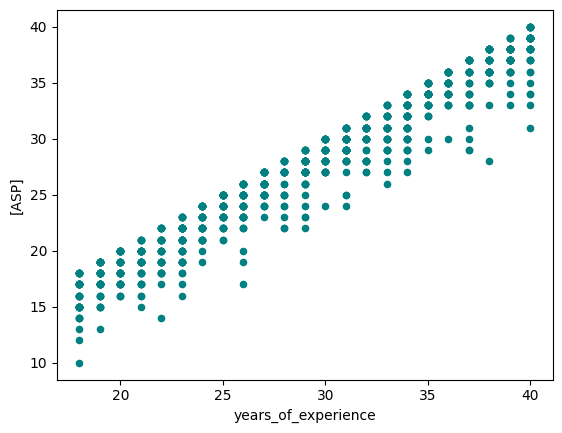

In [30]:
df.plot(x= 'years_of_experience', y= ['ASP'], kind= 'scatter', color= ['teal'])

<Axes: ylabel='years_of_experience'>

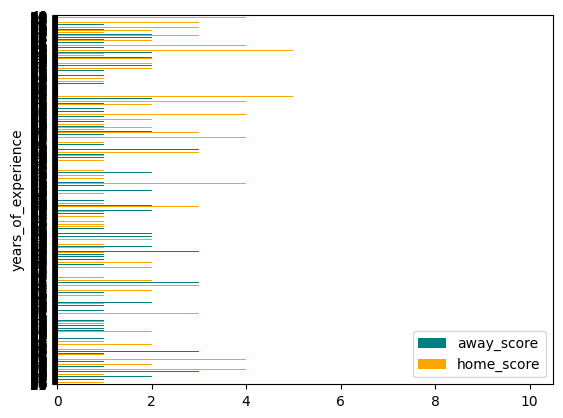

In [37]:
df.plot(x= 'years_of_experience', y= ['away_score','home_score'], kind= 'barh', color= ['teal','orange'])

In [50]:
#func to get agraph
def getgraph(DataFrame,column1,column2):
  from matplotlib import pyplot as plt
  #check the length of columns
  if len(DataFrame[column1]) == len(DataFrame[column2]):
    df.plot(x =column1, y=column2, kind= 'bar', color= ['yellow','orange'])
    print ('The graph is successfully created')
  else:
    print('Please check the columns size')

The graph is successfully created


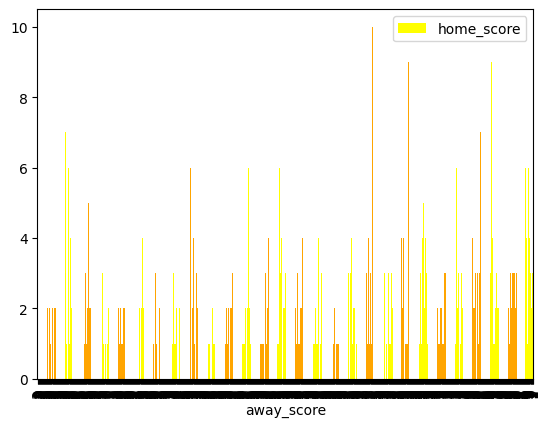

In [51]:
getgraph(df,'away_score','home_score')